In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000886982"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000886982
SIC,6211
Description,"SECURITY BROKERS, DEALERS & FLOTATION COMPANIES"
Name,GOLDMAN SACHS GROUP INC
Ticker,GS


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,1.0,2.090700e+02,NaN,2.090700e+02,2.090700e+02,2.090700e+02,2.090700e+02,2.090700e+02
interest income,41.0,3.096756e+09,9.053440e+08,2.035000e+09,2.424000e+09,2.937000e+09,3.354000e+09,5.597000e+09
net income,41.0,1.967073e+09,1.102462e+09,-1.928000e+09,1.512000e+09,2.109000e+09,2.524000e+09,4.948000e+09
net interest income,40.0,1.027050e+09,3.483731e+08,3.360000e+08,8.335000e+08,9.670000e+08,1.150500e+09,2.042000e+09
provision for loan losses,2.0,2.230000e+08,1.414214e+06,2.220000e+08,2.225000e+08,2.230000e+08,2.235000e+08,2.240000e+08
total revenue,41.0,8.779732e+09,1.912514e+09,3.587000e+09,7.887000e+09,8.642000e+09,9.402000e+09,1.376100e+10


# Plots

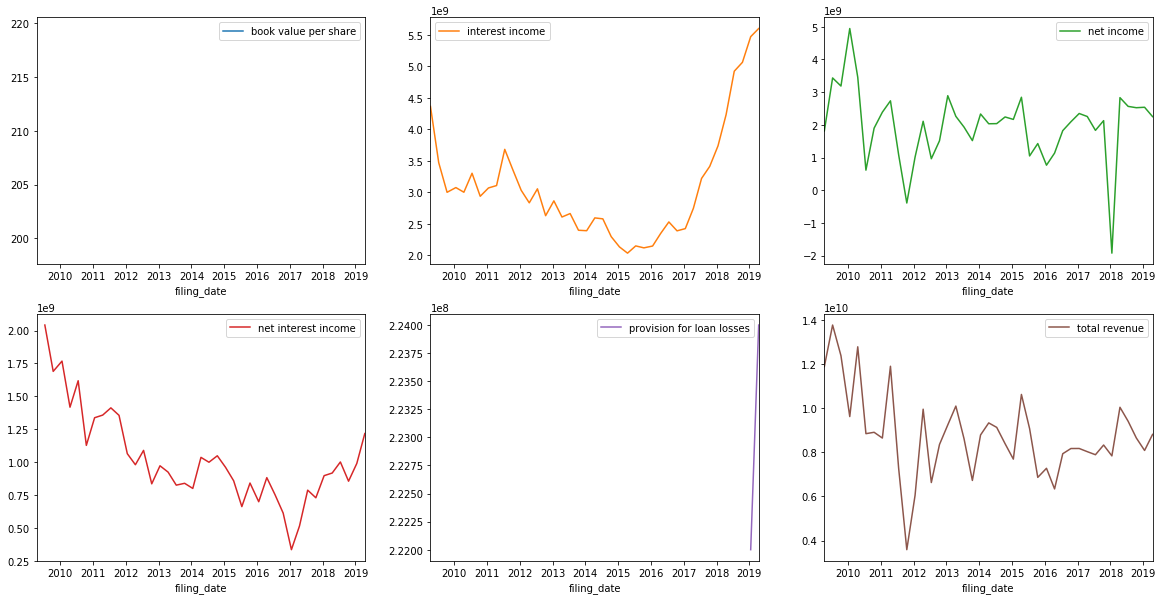

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000886982 book value per share       2009Q1 to 2018Q4: 40 periods  missing   
           net interest income                              2009Q1  missing   
           provision for loan losses  2009Q1 to 2018Q3: 39 periods  missing   

                                             message  
cik        item                                       
0000886982 book value per share       Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()